### Filter dataset to get list of positive and negative sites

In [8]:
# Autoreload 
%load_ext autoreload
%autoreload 2
import pandas as pd 
import numpy as np

from pathlib import Path
from typing import Union, List, Tuple, Dict, Optional

# STFU
pd.options.mode.chained_assignment = None  # default='warn'
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Load data

In [27]:
from phosphosite.dataset.uniprot import sequence_dict

### Load POSITIVE EXAMPLES

In [29]:
# These are filtered for STY sites only, 
# phosphorylation only, 
# and Human organism only. 
# We also have removed all isoforms. 
from phosphosite.dataset import psp_filtered
psp_filtered 


,uniprot_id,mod_rsd,mod,site,res,pos
0,P31946,T2-p,p,T2,T,2
1,P31946,S6-p,p,S6,S,6
2,P31946,Y21-p,p,Y21,Y,21
3,P31946,T32-p,p,T32,T,32
4,P31946,S39-p,p,S39,S,39
...,...,...,...,...,...,...
239815,Q8IYH5,S474-p,p,S474,S,474
239816,Q8IYH5,S606-p,p,S606,S,606
239817,Q8IYH5,Y670-p,p,Y670,Y,670
239818,Q8IYH5,S677-p,p,S677,S,677


### Structural annotation dataframe

From `structuremap`

In [1]:
from phosphosite.bubble.data import result_df
result_df[0:2]

,protein_id,prev,res,pos,next,ref_atom,ref_atom_dist,nn_res,nn_pos,nn_atom,site_qual,site_structure,nn_qual,nn_structure,seq_dist,triplet,phosphosite
0,A0A075B759,N,S,4,V,CA,4.805941,Q,163,NE2,93.22,unstructured,96.92,STRN,159,NSV,False
1,A0A075B759,N,S,4,V,OG,3.702720,Q,163,NE2,93.22,unstructured,96.92,STRN,159,NSV,False


In [26]:
result_df.phosphosite.value_counts()

False    2276206
True      297880
Name: phosphosite, dtype: int64

In [32]:
# Filter for only rows with CA atom 
structural_df = result_df[result_df.ref_atom == 'CA']
structural_df.phosphosite.value_counts()

False    1149675
True      151217
Name: phosphosite, dtype: int64

##### Structural annotation from `bubble` processing
Note: why are there only ~150,000 sites with structural annotations? 

When we had around 200,000 sites from PSP? 



Note: we may be able to use ALL the phosphosites for our training data, while only having a small subset (~150,000) with which to use for our 'distribution sampling'. 

In [37]:
# for the PHOSPHOSITES (positive examples)
# Get counts of each pLDDT range per secondary structure annotation. 
pos_examples = structural_df[structural_df.phosphosite == True]

# for each unique "site_structure" value, get the value counts

for site_structure in pos_examples.site_structure.unique():
    print(site_structure)
    distr = pos_examples[pos_examples.site_structure == site_structure].site_qual.value_counts(bins=20, sort=False)
    print(distr)

HELX_RH_AL_P
(24.244, 28.052]      12
(28.052, 31.783]      54
(31.783, 35.514]     168
(35.514, 39.246]     306
(39.246, 42.978]     456
(42.978, 46.709]     573
(46.709, 50.44]      689
(50.44, 54.172]      838
(54.172, 57.903]    1054
(57.903, 61.635]    1027
(61.635, 65.366]    1034
(65.366, 69.098]    1105
(69.098, 72.83]     1387
(72.83, 76.561]     1529
(76.561, 80.292]    2056
(80.292, 84.024]    2782
(84.024, 87.755]    4389
(87.755, 91.487]    5903
(91.487, 95.218]    7499
(95.218, 98.95]     9608
Name: site_qual, dtype: int64
unstructured
(17.767999999999997, 21.906]     143
(21.906, 25.961]                2046
(25.961, 30.016]                5806
(30.016, 34.072]                7270
(34.072, 38.128]                6320
(38.128, 42.183]                4920
(42.183, 46.238]                3734
(46.238, 50.294]                2874
(50.294, 54.35]                 2326
(54.35, 58.405]                 1902
(58.405, 62.46]                 1347
(62.46, 66.516]                 1119


In [39]:
neg_candidates = structural_df[structural_df.phosphosite == False]

# TODO: join with dbPTM and filter. 



In [ ]:
# Build a dataframe of all the negative examples, randomly sampling from the neg_candidates
# and assigned to bins

In [93]:
# Testing with one SS 

ss = "HELX_RH_AL_P"

pos_df = pos_examples[pos_examples.site_structure == ss]
neg_candidates = neg_candidates[neg_candidates.site_structure == ss]
neg_df = neg_candidates



In [87]:
distr = pos_df.site_qual.value_counts(bins=20, sort=False)
intervals = distr.index.to_list()

In [88]:
distr

(24.244, 28.052]      12
(28.052, 31.783]      54
(31.783, 35.514]     168
(35.514, 39.246]     306
(39.246, 42.978]     456
(42.978, 46.709]     573
(46.709, 50.44]      689
(50.44, 54.172]      838
(54.172, 57.903]    1054
(57.903, 61.635]    1027
(61.635, 65.366]    1034
(65.366, 69.098]    1105
(69.098, 72.83]     1387
(72.83, 76.561]     1529
(76.561, 80.292]    2056
(80.292, 84.024]    2782
(84.024, 87.755]    4389
(87.755, 91.487]    5903
(91.487, 95.218]    7499
(95.218, 98.95]     9608
Name: site_qual, dtype: int64

In [89]:
bins = pd.IntervalIndex(intervals)
bins

IntervalIndex([(24.244, 28.052], (28.052, 31.783], (31.783, 35.514], (35.514, 39.246], (39.246, 42.978] ... (80.292, 84.024], (84.024, 87.755], (87.755, 91.487], (91.487, 95.218], (95.218, 98.95]], dtype='interval[float64, right]')

In [91]:
distr[intervals[-1]]

9608

In [92]:
b = bins[0]
# index into distr
distr[bins[-1]]

9608

In [94]:
# Assign each negative example to a bin (intervals)
neg_df["binned"] = pd.cut(neg_df["site_qual"], bins)
neg_df

,protein_id,prev,res,pos,next,ref_atom,ref_atom_dist,nn_res,nn_pos,nn_atom,site_qual,site_structure,nn_qual,nn_structure,seq_dist,triplet,phosphosite,binned
0,A0A075B759,K,T,32,A,CA,3.949881,I,29,O,98.24,HELX_RH_AL_P,96.56,unstructured,-3,KTA,False,"(95.218, 98.95]"
0,A0A075B759,S,T,41,G,CA,3.960348,A,38,O,97.95,HELX_RH_AL_P,98.06,HELX_RH_AL_P,-3,STG,False,"(95.218, 98.95]"
0,A0A087WUL8,H,S,101,Q,CA,3.631385,L,98,O,95.07,HELX_RH_AL_P,95.47,HELX_RH_AL_P,-3,HSQ,False,"(91.487, 95.218]"
0,A0A087WUL8,A,S,120,R,CA,3.718260,G,116,O,92.87,HELX_RH_AL_P,94.65,HELX_RH_AL_P,-4,ASR,False,"(91.487, 95.218]"
0,A0A087WUL8,R,S,122,L,CA,3.736681,D,118,O,94.17,HELX_RH_AL_P,92.19,HELX_RH_AL_P,-4,RSL,False,"(91.487, 95.218]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,Q9HAU8,K,Y,473,K,CA,3.481472,T,476,OG1,97.70,HELX_RH_AL_P,96.26,STRN,3,KYK,False,"(95.218, 98.95]"
0,Q9HAU8,C,Y,590,S,CA,3.581844,L,586,O,96.08,HELX_RH_AL_P,96.05,HELX_RH_AL_P,-4,CYS,False,"(95.218, 98.95]"
0,Q9HAU8,M,Y,633,T,CA,3.941539,S,630,O,90.56,HELX_RH_AL_P,89.19,unstructured,-3,MYT,False,"(87.755, 91.487]"
0,Q9HAU8,L,Y,638,E,CA,3.649874,I,635,O,95.74,HELX_RH_AL_P,92.39,HELX_RH_AL_P,-3,LYE,False,"(95.218, 98.95]"


In [95]:
out_df = pd.DataFrame()
for bin in bins: 
    # count in original positives 
    count = distr[bin]
    df = neg_df[neg_df.binned == bin].sample(n=count)
    out_df = out_df.append(df)

out_df

,protein_id,prev,res,pos,next,ref_atom,ref_atom_dist,nn_res,nn_pos,nn_atom,site_qual,site_structure,nn_qual,nn_structure,seq_dist,triplet,phosphosite,binned
0,O94826,I,Y,57,L,CA,3.723444,S,60,OG,25.81,HELX_RH_AL_P,31.93,HELX_RH_AL_P,3,IYL,False,"(24.244, 28.052]"
0,Q8TD23,P,T,138,M,CA,4.492846,S,141,CB,28.02,HELX_RH_AL_P,32.99,HELX_RH_AL_P,3,PTM,False,"(24.244, 28.052]"
0,Q8NAT2,A,T,954,A,CA,4.386364,L,957,CB,26.74,HELX_RH_AL_P,35.34,HELX_RH_AL_P,3,ATA,False,"(24.244, 28.052]"
0,Q8N859,I,T,162,Q,CA,3.766205,H,158,O,25.41,HELX_RH_AL_P,26.63,HELX_RH_AL_P,-4,ITQ,False,"(24.244, 28.052]"
0,Q96RE9,V,T,149,F,CA,3.670859,F,145,O,26.71,HELX_RH_AL_P,31.32,HELX_RH_AL_P,-4,VTF,False,"(24.244, 28.052]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,Q12882,A,S,500,W,CA,3.776311,K,497,O,98.82,HELX_RH_AL_P,98.78,HELX_RH_AL_P,-3,ASW,False,"(95.218, 98.95]"
0,Q7L8L6,C,S,401,A,CA,3.890077,L,440,CG,97.23,HELX_RH_AL_P,98.47,TURN_TY1_P,39,CSA,False,"(95.218, 98.95]"
0,Q8NFZ5,M,S,312,E,CA,3.727616,D,308,O,98.53,HELX_RH_AL_P,98.55,HELX_RH_AL_P,-4,MSE,False,"(95.218, 98.95]"
0,Q16719,L,S,147,F,CA,3.538347,L,144,O,98.62,HELX_RH_AL_P,98.90,HELX_RH_AL_P,-3,LSF,False,"(95.218, 98.95]"


In [96]:
sum(distr.values)

42469

In [97]:
len(pos_df), len(out_df)

(42469, 42469)

### Visually check that sampling is approximately correct

<Axes: xlabel='site_qual', ylabel='Count'>

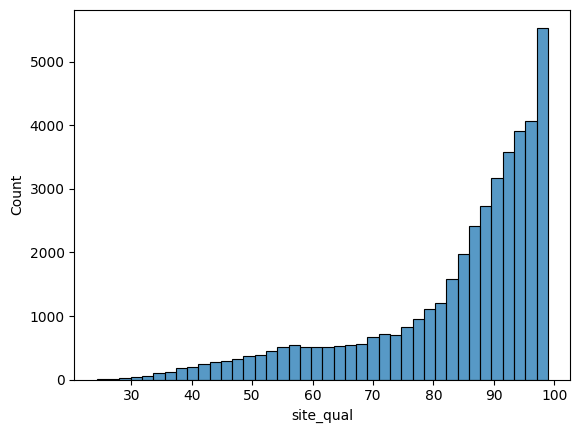

In [102]:
# Plot histogram of the distribution of pLDDT scores for the positive and negative examples.
import seaborn as sns 

n_bins = 40
sns.histplot(pos_df.site_qual, bins=n_bins, kde=False, label="positive")

<Axes: xlabel='site_qual', ylabel='Count'>

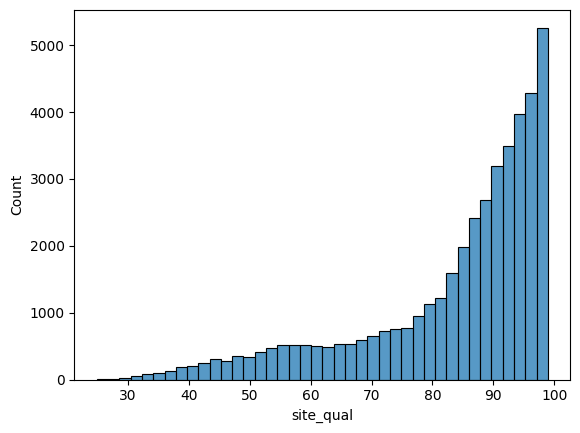

In [103]:
sns.histplot(out_df.site_qual, bins=n_bins, kde=False, label="negative")

In [54]:
bins = pd.IntervalIndex.from_tuples([(0, 1), (2, 3), (4, 5)])

In [58]:
pd.cut([0, 0.5, 1.5, 2.5, 4.5], bins)

[NaN, (0.0, 1.0], NaN, (2.0, 3.0], (4.0, 5.0]]
Categories (3, interval[int64, right]): [(0, 1] < (2, 3] < (4, 5]]

### Function that performs the sampling 

Given a ratio (1:1 by default) of COUNTS, or a NUMBER (i.e. total number of rows to randomly sample) 
 
- given n bins 
-  

sample for all unique column values such that distribution of 2nd column for each is same.  


Can provide the dataframe from which to base the *distribution* on (i.e. structural df of 150,000 rows) but scale
the ratios of all the counts (for each bin) by a factor such that the sum is equal to "count" (i.e. 200,000 actual rows used in dataset) 
so that we can combine with the pos example dataframe which didn't necessarily have structural annotation data. 



In [ ]:
from typing import Any, Union, List, Tuple, Dict, Optional

def sample_from_plddt_distribution(
    data: Any, 
    secondary_structure_col: str, 
    plddt_col: str, 
    n_bins: int = 20,
    n_samples: int = None, 


) -> pd.DataFrame: 
    """ 
    Generate a dataframe of negative examples by sampling from the distribution of pLDDT scores
    for a given (discrete) secondary structure annotation.

    Parameters
    ----------
    data: Any
        Dataframe containing the positive examples.
    secondary_structure_col: str
        Name of the column containing the secondary structure annotation.
    plddt_col: str
        Name of the column containing the pLDDT score.
    n_bins: int
        Number of bins to use for the value counts.
    n_samples: int
        Number of samples to generate. If `None`, will generate the same number of samples as the positive examples.
        If a number greater than the number of positive examples is given, then the relative counts of the bins
        will be scaled up such that the total number of rows in the returned dataframe is equal to `n_samples`.

    Returns
    -------
    pd.DataFrame
        Dataframe containing the negative examples.
    """



    # TODO

### Load dbPTM

In [25]:
from phosphosite.dataset.dbptm import dbptm_phosphorylation as dbptm 
dbptm

,gene_name,uniprot_id,position,ptm_type,evidence,seq_window,residue
0,MYSC_ACACA,P10569,311,Phosphorylation,2530230,TTGEQGRGRSSVYSCPQDPLG,S
1,MYSB_ACACA,P19706,315,Phosphorylation,2530230,NTGGAGAKKMSTYNVPQNVEQ,S
2,14333_ARATH,P42644,162,Phosphorylation,30395287;22092075;25561503,VAYKSASDIATAELAPTHPIR,T
3,14333_ARATH,P42644,238,Phosphorylation,30291188;24924143;30395287;19880383;20466843;2...,DNLTLWTSDMTDEAGDEIKEA,T
4,14335_ARATH,P42645,267,Phosphorylation,30291188;23776212;19376835;27531888;30395287;2...,KVDEQAQPPPSQ---------,S
...,...,...,...,...,...,...,...
1615049,ZRAB2_HUMAN,O95218-2,120,Phosphorylation,18669648,ENVEYIEREESDGEYDEFGRK,S
1615050,ZRAB2_HUMAN,O95218-2,153,Phosphorylation,18669648,SILKEVEDKESEGEEEDEDED,S
1615051,ZRAB2_HUMAN,O95218-2,181,Phosphorylation,18669648,EDEDEDDADLSKYNLDASEEE,S
1615052,ZRAB2_HUMAN,O95218-2,183,Phosphorylation,18669648,EDEDDADLSKYNLDASEEEDS,Y


In [18]:
dbptm.columns

Index(['gene_name', 'uniprot_id', 'position', 'ptm_type', 'evidence',
       'seq_window'],
      dtype='object')

### Filter

In [ ]:
# Filter by residue type i.e. is in "STY"
allowed_residues = ["S", "T", "Y"]
#allowed_residues = ["Y"]
filtered = df_counts[df_counts.residue.isin(allowed_residues)]
filtered

In [ ]:
all_df = pd.merge(
    filtered,
    dbptm,
    how="left",
    on=["uniprot_id", "position", "residue"],
    indicator="exists", 
)
all_df["dbptm_phosphorylation"] = np.where(all_df.exists == 'both', True, False)
all_df = all_df.drop("exists", axis=1)
all_df[all_df.dbptm_phosphorylation == True]

all_df.dbptm_phosphorylation.value_counts()

In [ ]:
# Get rid of all rows that are not phosphorylated.
filtered = all_df[all_df.dbptm_phosphorylation == False] # not in dbptm 

# Get rid of rows below threshold of n_obs 
threshold = 100
filtered = filtered[filtered.n_obs > threshold]
filtered

### Filter by PSP

In [ ]:
# Repeat by filtering anything out of PhosphoSitePlus
from phosphosite.dataset import psp_filtered

psp_filtered.rename(columns={"res": "residue", "pos": "position"}, inplace=True)
psp_filtered = psp_filtered[[
    "uniprot_id", "position", "residue",
]]

all_df = pd.merge(
    filtered,
    psp_filtered,
    how="left",
    on=["uniprot_id", "position", "residue"],
    indicator="exists",
)
all_df["psp_phosphorylation"] = np.where(all_df.exists == 'both', True, False)
all_df = all_df.drop("exists", axis=1)

# Get rid of rows that are psp_phosphorylation == True
filtered = all_df[all_df.psp_phosphorylation == False] # not in psp
filtered
